# First Question

### A

In [1]:
library(ggplot2)
data <- as.data.frame(economics)

### B

In [2]:
head(data)

summary_stats <- data.frame(
  Mean = sapply(data, mean, na.rm = TRUE),
  Median = sapply(data, median, na.rm = TRUE),
  StdDev = sapply(data, sd, na.rm = TRUE)
)
print(summary_stats)

,date,pce,pop,psavert,uempmed,unemploy
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1967-07-01,506.7,198712,12.6,4.5,2944
2,1967-08-01,509.8,198911,12.6,4.7,2945
3,1967-09-01,515.6,199113,11.9,4.6,2958
4,1967-10-01,512.2,199311,12.9,4.9,3143
5,1967-11-01,517.4,199498,12.8,4.7,3066
6,1967-12-01,525.1,199657,11.8,4.8,3018


                 Mean    Median       StdDev
date     7.806399e+03   7805.50  5047.869347
pce      4.820093e+03   3936.85  3556.803613
pop      2.571597e+05 253060.00 36682.398508
psavert  8.567247e+00      8.40     2.964179
uempmed  8.608711e+00      7.50     4.106645
unemploy 7.771310e+03   7494.00  2641.959180


### C

In [3]:
total_unemploy <- sum(data$unemploy, na.rm = TRUE)
total_pop <- sum(data$pop, na.rm = TRUE)
cat("Total unemployment rate:", total_unemploy, "\n")
cat("Total population:", total_pop, "\n")

Total unemployment rate: 4460732 
Total population: 147609641 


### D 

In [4]:
data$year <- format(data$date, "%Y")
unemploy_avg_per_year <- aggregate(unemploy ~ year, data = data, mean)
print(unemploy_avg_per_year)


   year  unemploy
1  1967  3012.333
2  1968  2797.417
3  1969  2830.167
4  1970  4127.333
5  1971  5021.667
6  1972  4875.833
7  1973  4359.333
8  1974  5173.333
9  1975  7939.583
10 1976  7398.167
11 1977  6966.917
12 1978  6187.083
13 1979  6135.333
14 1980  7670.667
15 1981  8276.333
16 1982 10714.917
17 1983 10693.750
18 1984  8529.083
19 1985  8313.417
20 1986  8245.000
21 1987  7413.500
22 1988  6696.583
23 1989  6523.667
24 1990  7061.000
25 1991  8639.833
26 1992  9611.167
27 1993  8926.667
28 1994  7975.500
29 1995  7406.917
30 1996  7231.083
31 1997  6728.667
32 1998  6203.833
33 1999  5878.833
34 2000  5685.083
35 2001  6829.667
36 2002  8375.333
37 2003  8770.333
38 2004  8139.667
39 2005  7579.167
40 2006  6991.250
41 2007  7073.083
42 2008  8948.167
43 2009 14294.500
44 2010 14807.750
45 2011 13738.500
46 2012 12499.167
47 2013 11457.167
48 2014  9601.500
49 2015  8635.750


### E

In [5]:
max_unemploy_row <- data[which.max(data$unemploy), ]
print(max_unemploy_row)

          date    pce    pop psavert uempmed unemploy year
508 2009-10-01 9931.9 308189     5.4    18.9    15352 2009


### F

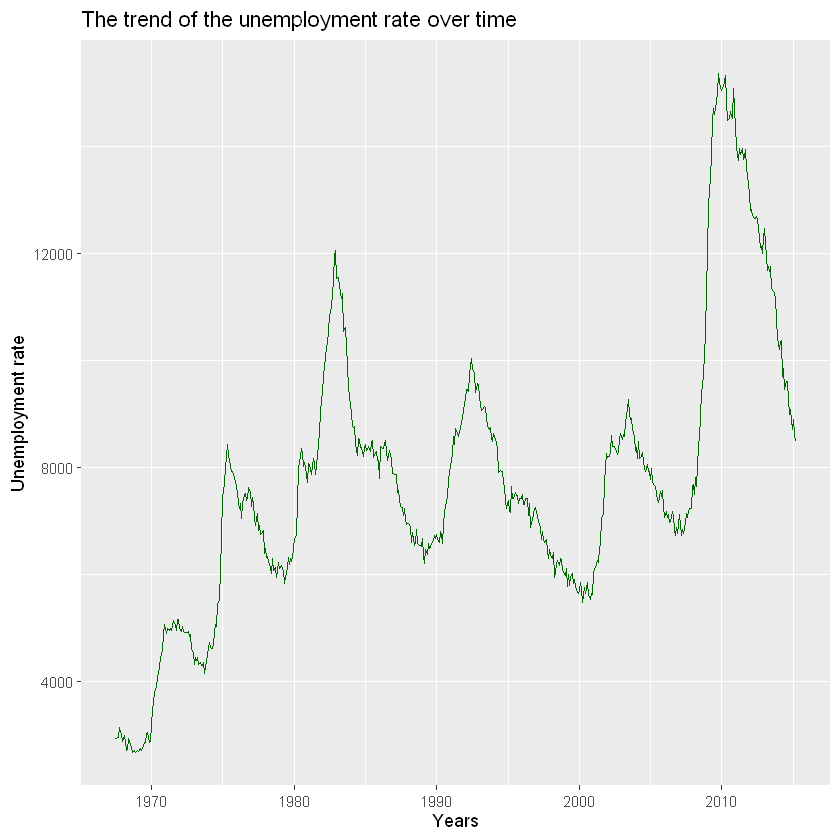

In [6]:
unemploy_trend_plot <- ggplot(data, aes(x = date, y = unemploy)) +
  geom_line(color = "dark green") +
  labs(title = "The trend of the unemployment rate over time", x = "Years", y = "Unemployment rate")
print(unemploy_trend_plot)

### G

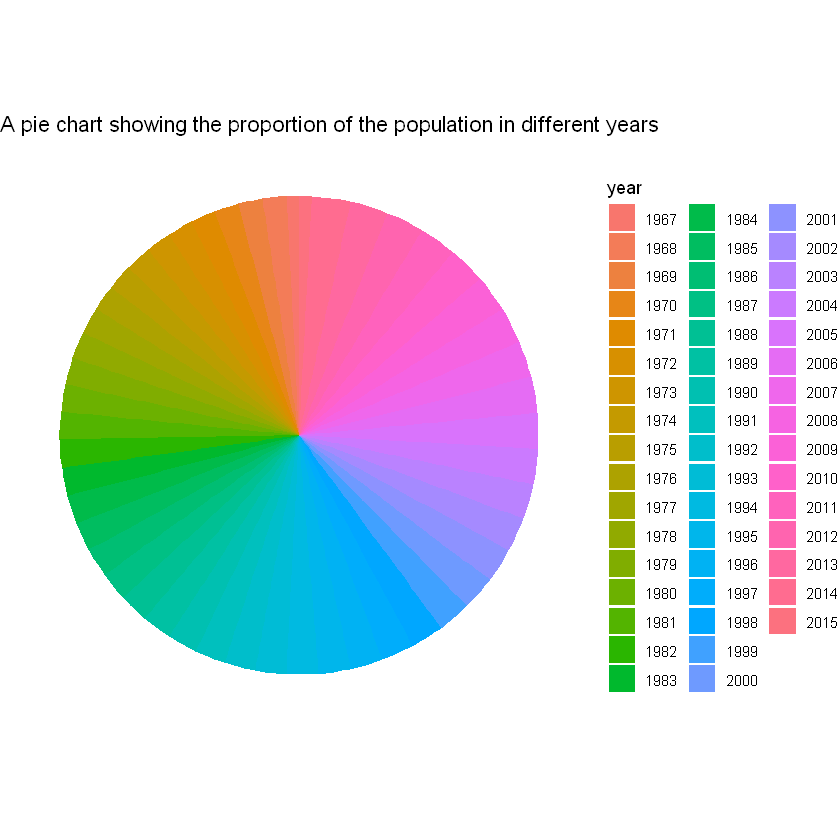

In [7]:
pop_per_year <- aggregate(pop ~ year, data = data, sum)
pop_per_year$percentage <- (pop_per_year$pop / sum(pop_per_year$pop)) * 100
pie_chart <- ggplot(pop_per_year, aes(x = "", y = percentage, fill = year)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "A pie chart showing the proportion of the population in different years") +
  theme_void()
print(pie_chart)

### H

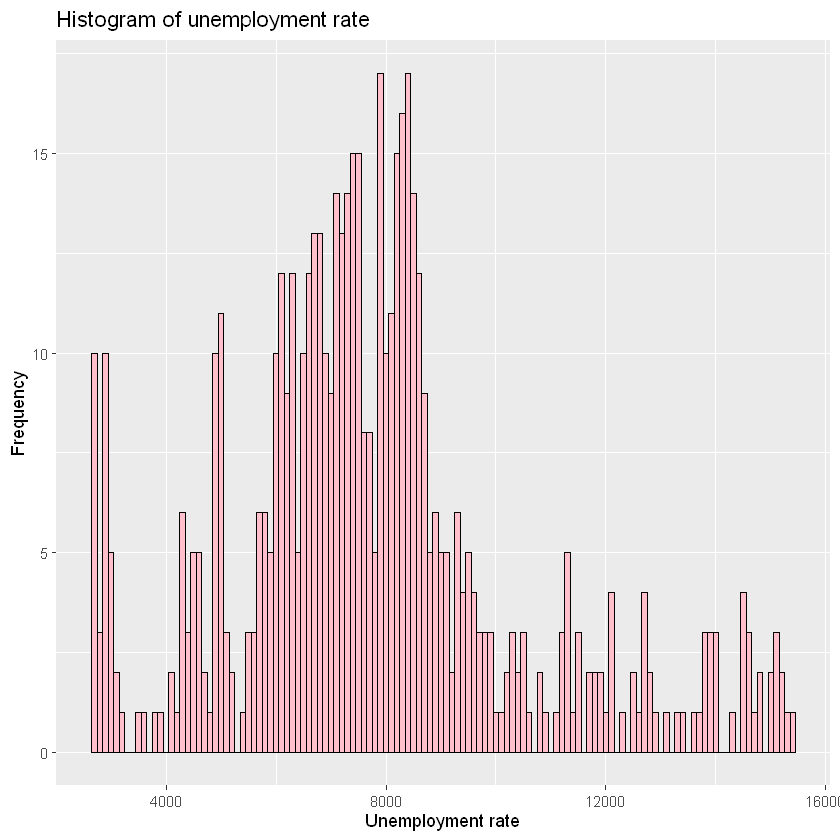

In [8]:
unemploy_histogram <- ggplot(data, aes(x = unemploy)) +
  geom_histogram(binwidth = 100, fill = "pink", color = "black") +
  labs(title = "Histogram of unemployment rate", x = "Unemployment rate", y = "Frequency")
print(unemploy_histogram)

### I

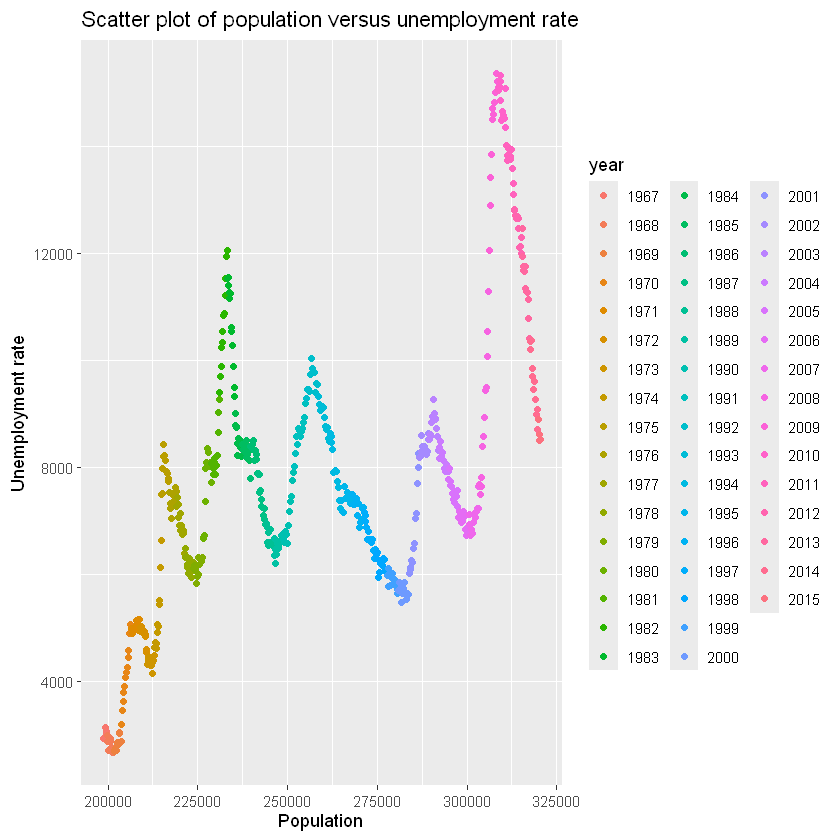

In [9]:
scatter_plot <- ggplot(data, aes(x = pop, y = unemploy, color = year)) +
  geom_point() +
  labs(title = "Scatter plot of population versus unemployment rate", x = "Population", y = "Unemployment rate")
print(scatter_plot)

### J

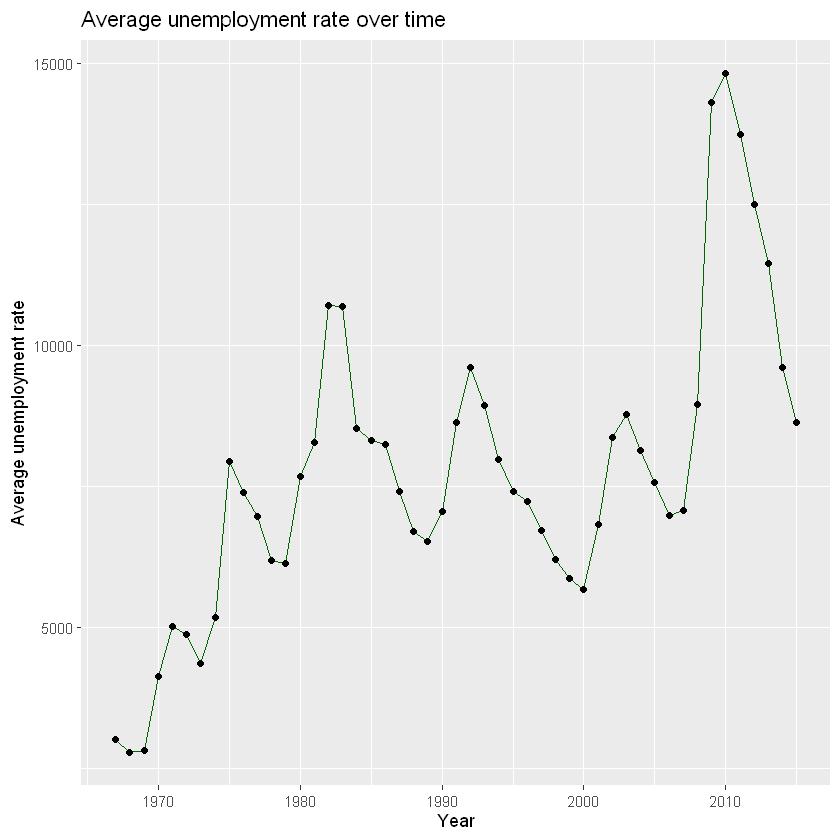

In [10]:
mean_unemploy_plot <- ggplot(unemploy_avg_per_year, aes(x = as.numeric(year), y = unemploy)) +
  geom_line(color = "dark green") +
  geom_point() +
  labs(title = "Average unemployment rate over time", x = "Year", y = "Average unemployment rate")
print(mean_unemploy_plot)

# Second Question

In [11]:
blood_pressure_after <- c(115, 118, 122, 119, 121, 116, 114, 123, 117, 120,
                          119, 118, 115, 116, 122, 121, 120, 119, 118, 117,
                          123, 124, 115, 116, 117, 118, 119, 120, 121, 122)

mean_before <- 120

result <- t.test(blood_pressure_after, 
                 mu = mean_before, 
                 alternative = "less", 
                 conf.level = 0.95)

print(result)



	One Sample t-test

data:  blood_pressure_after
t = -2.3514, df = 29, p-value = 0.01285
alternative hypothesis: true mean is less than 120
95 percent confidence interval:
     -Inf 119.6764
sample estimates:
mean of x 
 118.8333 



Based on the p-value, it can be concluded that the new drug has significantly reduced blood pressure, since this value is less than the significance level. Therefore, the null hypothesis — which states that the drug has no effect on reducing blood pressure — is rejected. As a result, the new drug is likely effective and reduces blood pressure.


In [12]:
blood_pressure_after <- c(115, 118, 122, 119, 121, 116, 114, 123, 117, 120,
                          119, 118, 115, 116, 122, 121, 120, 119, 118, 117,
                          123, 124, 115, 116, 117, 118, 119, 120, 121, 122)

mean_before <- 120

result <- t.test(blood_pressure_after, 
                 mu = mean_before, 
                 alternative = "two.sided", 
                 conf.level = 0.95)

print(result)



	One Sample t-test

data:  blood_pressure_after
t = -2.3514, df = 29, p-value = 0.02571
alternative hypothesis: true mean is not equal to 120
95 percent confidence interval:
 117.8186 119.8481
sample estimates:
mean of x 
 118.8333 



The p-value is still less than the significance level.

Therefore, the conclusion remains unchanged — the drug has significantly affected blood pressure.


### Difference in Conclusion:

* In the **one-tailed test**: Since our assumption was that blood pressure might decrease, the result indicates that the drug has reduced blood pressure.
* In the **two-tailed test**: We reach the same conclusion, but this test examines whether the drug has caused any significant change in blood pressure in general, without specifying the direction of the change.

Overall, both tests indicate that the drug has had a significant effect in lowering blood pressure.


# Third Question

### A 

In [13]:
library(ggplot2)
data <- as.data.frame(quakes)
head(quakes, 10)

,lat,long,depth,mag,stations
,<dbl>,<dbl>,<int>,<dbl>,<int>
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
6,-19.68,184.31,195,4.0,12
7,-11.70,166.10,82,4.8,43
8,-28.11,181.93,194,4.4,15
9,-28.74,181.74,211,4.7,35


### B

In [14]:
cor(quakes$mag, quakes$depth)

[1] -0.2306377

### C 

Installing package into 'C:/Users/ASUS/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpMXu9cy\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 4.4.3"
corrplot 0.95 loaded



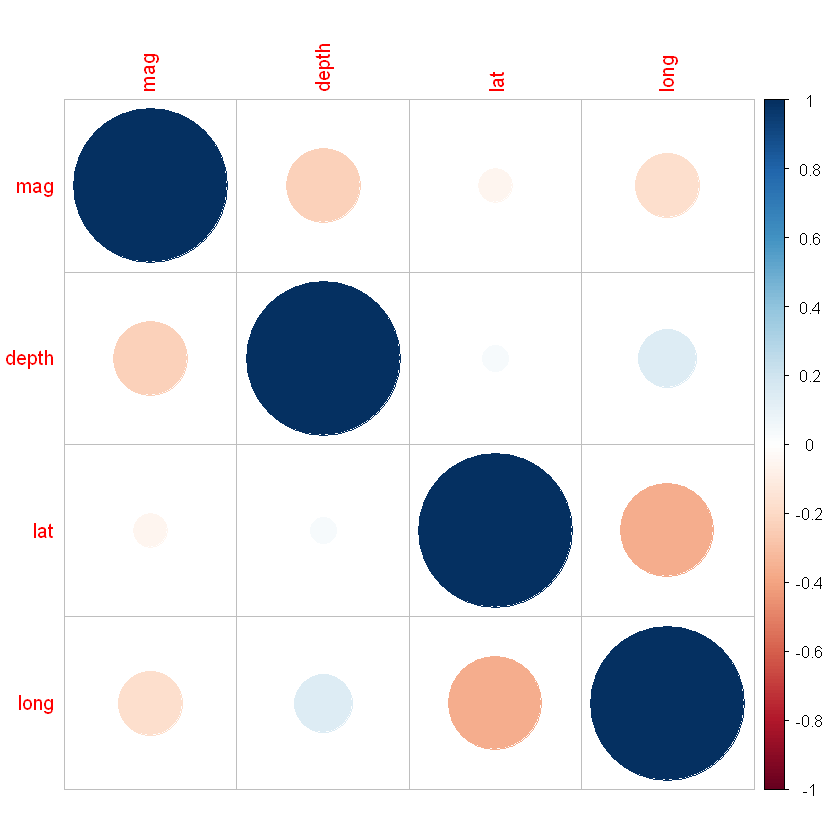

In [15]:
install.packages("corrplot")

library(corrplot)

cor_matrix <- cor(quakes[, c("mag", "depth", "lat", "long")])

corrplot(cor_matrix, method = "circle")

### D

In this matrix, the larger the circles, the stronger the correlation. Dark blue indicates a strong positive correlation, while dark red indicates a strong negative correlation.

Based on the chart, the following observations can be made:

1. **Depth and Magnitude (depth, mag):**
   There is a moderate negative correlation, as indicated by the medium-sized red circle. This means that as the magnitude increases, the depth tends to decrease, and vice versa.

2. **Latitude and Magnitude (lat, mag):**
   There is very little correlation with latitude and longitude — the circles are small and nearly white.

3. **Latitude and Depth (lat, depth):**
   Depth shows a weak negative relationship with latitude and longitude. The circles are small and light-colored.

4. **Longitude and Latitude (long, lat):**
   There is a strong negative correlation, shown by a large red circle. This suggests that latitude and longitude have an inverse relationship — as one increases, the other tends to decrease.

5. **Magnitude and Longitude (mag, long):**
   There is a relatively weak negative correlation, represented by a medium red circle.

6. **Depth and Longitude (depth, long):**
   There is a relatively weak positive correlation, indicated by a small blue circle.


### E

In [16]:
cor(quakes)

,lat,long,depth,mag,stations
lat,1.000000000,-0.36454404,0.03102583,-0.05046165,-0.002220645
long,-0.364544037,1.00000000,0.14444341,-0.17306726,-0.053512460
depth,0.031025831,0.14444341,1.00000000,-0.23063770,-0.073515097
mag,-0.050461651,-0.17306726,-0.23063770,1.00000000,0.851182422
stations,-0.002220645,-0.05351246,-0.07351510,0.85118242,1.000000000


### F

In [17]:
cor.test(quakes$mag, quakes$depth)


	Pearson's product-moment correlation

data:  quakes$mag and quakes$depth
t = -7.488, df = 998, p-value = 1.535e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2885057 -0.1710909
sample estimates:
       cor 
-0.2306377 


Their correlation is slightly negative. This can also be seen in the chart, where a moderately sized red circle appears — indicating that the variables are somewhat related, but their relationship is inverse.


To determine whether the correlation is statistically significant, a **Correlation Test** can be performed by comparing the *p-value* with 0.05.

In this test, the hypotheses are as follows:

* **Null hypothesis (H₀):** There is no significant linear relationship between *mag* and *depth* (correlation coefficient = 0).
* **Alternative hypothesis (H₁):** There is a significant linear correlation between *mag* and *depth* (correlation coefficient ≠ 0).

Given the very small *p-value* (1.535e-13) and the negative correlation coefficient (-0.2306377), we can confidently reject the null hypothesis. This indicates that there is a statistically significant but weak negative correlation between *mag* and *depth*.

In other words, as depth increases, the *mag* value slightly decreases — although this relationship is not strong.
**Therefore, while the two variables are significantly related and depth may have some influence on magnitude, the strength of this effect is weak.**


### G

`geom_smooth()` using formula = 'y ~ x'


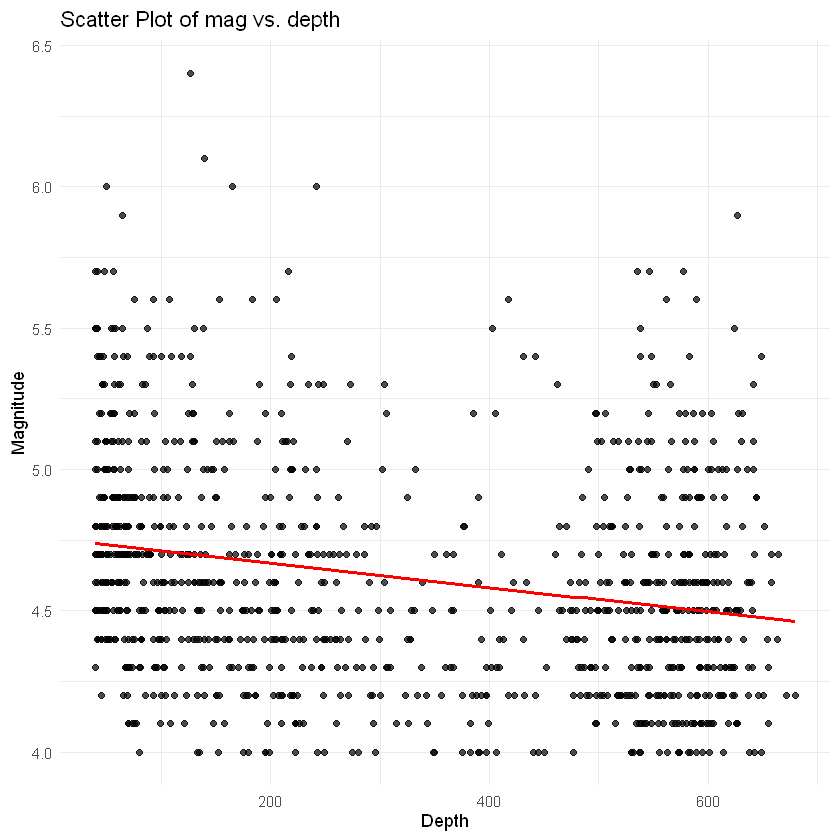

In [18]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)
ggplot(quakes, aes(x = depth, y = mag)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", col = "red", se = FALSE) +
  labs(title = "Scatter Plot of mag vs. depth",
       x = "Depth",
       y = "Magnitude") +
  theme_minimal()

### H

Based on the regression line, it can be concluded that there is an inverse relationship between **magnitude** and **depth**. As the depth increases, the magnitude decreases slightly, and vice versa. The small slope of the line indicates that this dependency is weak in strength.
